## **Simple Classifiers**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model

In [2]:
# Load the wine dataset
dataset = datasets.load_wine()

In [3]:
print(dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
set(dataset['target'])

{np.int64(0), np.int64(1), np.int64(2)}

### **Binary classifier**

In [5]:
# Prepare the data
y = (dataset['target'] == 1) * 1
x = dataset['data']

In [6]:
from sklearn import model_selection

In [7]:
# Split the data
rand_state = 1234

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=rand_state)

Text(0, 0.5, 'Freq')

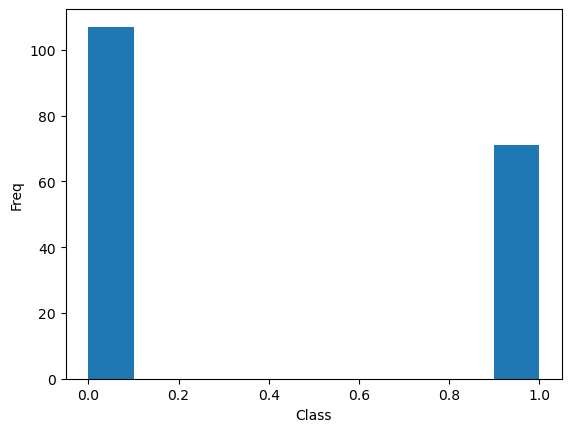

In [8]:
# Understand the data

# Number of samples in each class
_ = plt.hist(y)
plt.xlabel('Class')
plt.ylabel('Freq')

# data is not imbalance

In [9]:
df_x = pd.DataFrame(x_train, columns=dataset['feature_names'])
df_y = pd.DataFrame(y_train, columns=['Target'])
df = pd.concat([df_x, df_y], axis=1)

In [10]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,1
1,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
2,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,0
3,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
4,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,0
129,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
130,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
131,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0


In [11]:
from sklearn import preprocessing

In [12]:
# Preprocess the data
scaler = preprocessing.StandardScaler() # turn features into z-value
x_train_scaled = scaler.fit_transform(x_train)

In [13]:
# Train the model
model = linear_model.LogisticRegression(penalty='l2')
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [14]:
# Make predictions
model.predict(scaler.transform(x_test)) # do not scaler.fit on test data

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1])

In [15]:
# Intepret the results
print(model.intercept_)
print(model.coef_)

[-1.58926961]
[[-1.45995442 -0.81173848 -0.87012708  0.64223873 -0.04612869  0.03610976
   0.25628094  0.25681047  0.17739038 -1.89995605  1.00555049  0.12817629
  -1.66970355]]


### **Multi-class classifier**

In [16]:
# Prepare the data
y = dataset['target'] # target is already in usable form
x = dataset['data']

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# to split and have each class evenly in both train and test set

In [18]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=rand_state)
for train_idx, test_idx, in sss.split(x, y):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [19]:
# Preprocess the data
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [20]:
# Train the model
model = linear_model.LogisticRegression(penalty='l2')
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [21]:
# Make predictions
model.predict(scaler.transform(x_test))

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0])

In [22]:
# get probability of being each class of each test sample
prob = model.predict_proba(scaler.transform(x_test))
prob

array([[9.36623205e-02, 9.06066912e-01, 2.70767090e-04],
       [5.63954383e-03, 5.99628068e-02, 9.34397649e-01],
       [9.98746972e-01, 1.17260330e-03, 8.04248625e-05],
       [9.73071572e-01, 2.11173740e-02, 5.81105443e-03],
       [2.98250650e-01, 6.95844884e-01, 5.90446538e-03],
       [2.69057958e-02, 9.69689903e-01, 3.40430159e-03],
       [5.42238042e-02, 9.36859051e-01, 8.91714491e-03],
       [1.71502469e-04, 9.99355450e-01, 4.73047354e-04],
       [9.85718123e-01, 1.37385573e-02, 5.43319987e-04],
       [1.37240699e-03, 1.95602578e-03, 9.96671567e-01],
       [9.93010023e-01, 6.22205584e-03, 7.67921335e-04],
       [5.17224104e-03, 9.94711765e-01, 1.15994349e-04],
       [6.89710082e-04, 9.98939275e-01, 3.71015160e-04],
       [1.53058830e-03, 3.33454578e-02, 9.65123954e-01],
       [5.80087817e-04, 9.98721309e-01, 6.98602723e-04],
       [7.34328232e-04, 4.02492617e-02, 9.59016410e-01],
       [1.51373782e-03, 9.58981396e-04, 9.97527281e-01],
       [5.45037853e-01, 4.52877

In [23]:
# use probability to predict
np.array([np.argmax(e) for e in prob])

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0])

In [24]:
# Intepret the results
print(model.intercept_)
print(model.coef_)

[ 0.10545171  0.66904969 -0.7745014 ]
[[ 0.67748519  0.14421269  0.23390377 -0.41579484  0.31805217  0.37692913
   0.5778624  -0.2414487   0.14266411  0.20622148  0.16805352  0.66841906
   0.97589961]
 [-0.65621262 -0.30682022 -0.6813854   0.27366739 -0.42283594 -0.17921962
   0.38786266  0.2398483   0.11539896 -0.95378068  0.64783753  0.02085773
  -0.92928066]
 [-0.02127256  0.16260753  0.44748163  0.14212746  0.10478377 -0.19770951
  -0.96572506  0.0016004  -0.25806307  0.74755919 -0.81589105 -0.68927678
  -0.04661895]]
